# Measure Clinker hydrate fringe
This is a script to measure the hydrate fringe around a clinker grain.

## loading required libaries

In [1]:
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
from functions import *

# Some images are rather large. Therefore, the limit has to be extended:
# https://stackoverflow.com/questions/60963452/remove-opencv-image-size-limitation
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,40).__str__()

load_example = True
home_dir = os.path.abspath("")

dictionary which defines basic settings for all available images

In [2]:
files = {'C2S': {'label': 'C$_{2}}$S',
                 'data' : {
                             14 : { 'name': 'Layer-C2S 14d CBS 12kV (cleaned).tif',  't_pores':  78, 't_clinker': 208, 'min_rim': 0.5 },
                             28 : { 'name': 'Layer-C2S 28d (2) (stitched).tif',      't_pores':  53, 't_clinker': 211, 'min_rim': 0.5 },
                             84 : { 'name': 'Layer-C2S 84d CBS 12kV (cleaned).tif',  't_pores': 160, 't_clinker': 215, 'min_rim': 0.5 },
                            365 : { 'name': 'Layer-C2S 1year (stitched).tif',        't_pores': 146, 't_clinker': 222, 'min_rim': 0.5 }
                        }
                },
         'C3S': {'label': 'C$_{3}}$S',
                 'data' : {
                              1 : { 'name': '2019_04_15 FK C3S 1d-Tile Set (2).tif', 't_pores': 123, 't_clinker': 190, 'min_rim': 0.3 },
                              7 : { 'name': '7d_example.tif',                        't_pores': 103, 't_clinker': 185, 'min_rim': 0.4 },
                              #7 : { 'name': 'Layer-C3S 7d (stitched).tif',           't_pores': 99, 't_clinker': 190, 'min_rim': 0.4 },
                             14 : { 'name': 'Layer-C3S 14d CBS 12kV (stitched)',     't_pores':  75, 't_clinker': 168, 'min_rim': 1.0 },
                             28 : { 'name': '2019_04_15 FK C3S 28d CT.tif',          't_pores': 135, 't_clinker': 194, 'min_rim': 0.5 },
                            365 : { 'name': 'Layer-C3S 1year (stitched).tif',        't_pores': 135, 't_clinker': 194, 'min_rim': 0.5 }
                        }
                }
        }

## load file
select the specimen and age to be analysed in this notebook

In [3]:
specimen = 'C3S' # or C3S
age      = 7 # in days, see dictionary below, what ages are available

Select the relevant data from the dictionary and basic settings.

These data may be overwritten manually. Just define the tiff-image to be processed, select the thresholds which separate pores from hydrate (`t_pores`) and hydrate from unhydrated clinker (`t_alite`) and define the lower limit for the rim-width (`min_rim`). The age is relevant for the final evaluation notebook (`final_evaluation.ipynb`).

Loaded an image with 2929x2929 px
 - scaling: 0.0809 µm / px
 - size:    237.1 x 237.1 µm = 0.06 mm²

 - Selected color thresholds: 0-103 for pores 104-184 for hydrates and 185-255 for alite
 - Analyzing gains with areas from 0.066 µm² up to 176.71 µm²
 - Analyzing gains with diameters from 0.30 µm up to 15.0 µm

metadata saved to C:\Users\Florian Kleiner\Desktop\GIT\measure_hydrate_layer\last_processed.meta


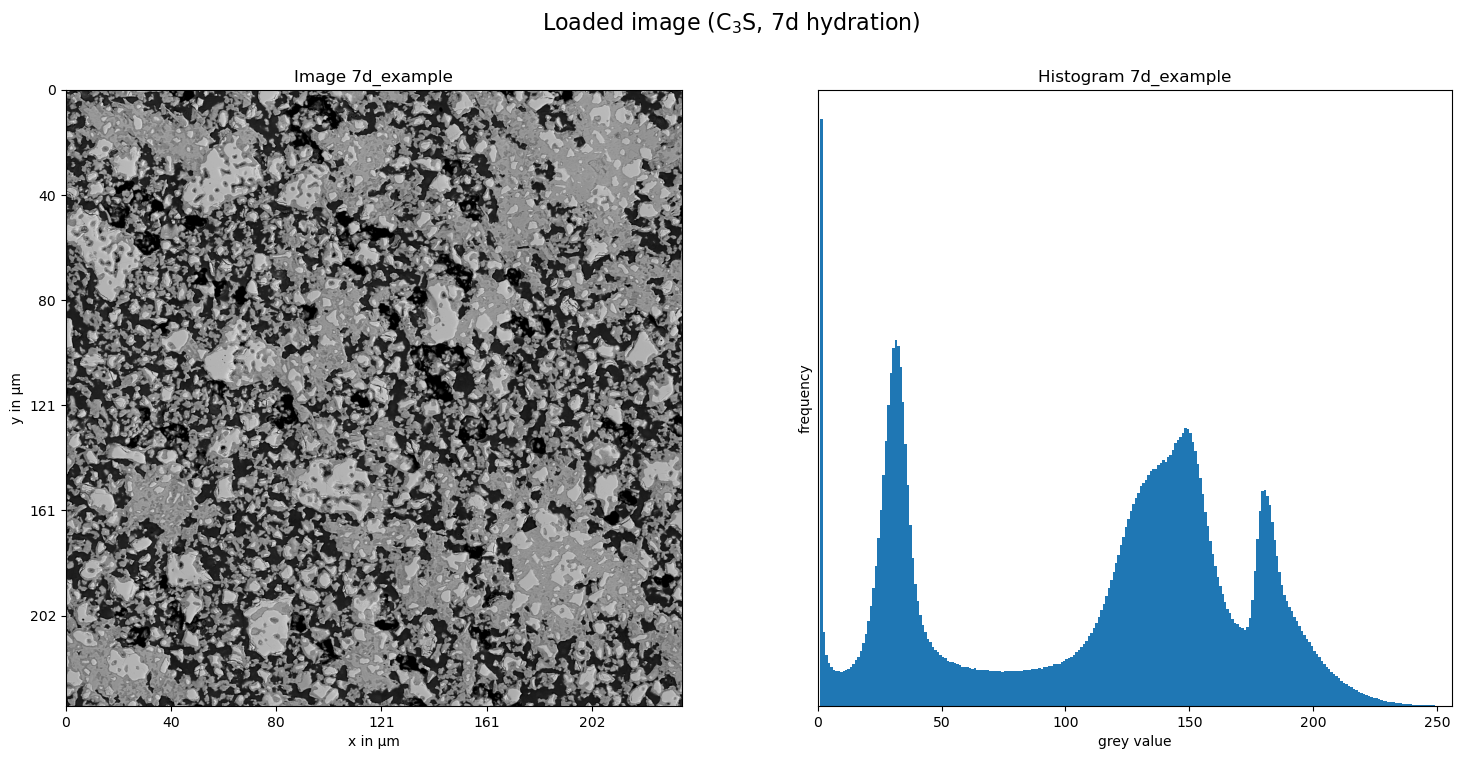

In [4]:
tiff_file = home_dir + os.sep + specimen + os.sep + '{}d'.format(age) + os.sep + files[specimen]['data'][age]['name']

show_images = True
settings = {
    'specimen'        : specimen,
    'age'             : age, # in days
    'label'           : '{}, {}d hydration'.format(files[specimen]['label'], age),
    't_pores'         : files[specimen]['data'][age]['t_pores'],
    't_alite'         : files[specimen]['data'][age]['t_clinker'],
    'enhance_hist'    : True,
    'denoise'         : True,
    'denoising_algorithm' : 'nlm',
    'min_grain_dia'   : 0.30, # diameter in µm
    'max_grain_dia'   : 15.00, # diameter in µm
    'min_circularity' : 0.10, # 0.0-1.0, where 1.0 is a perfect circle
    'max_rim'         : 9.0,
    'min_rim'         : files[specimen]['data'][age]['min_rim'],
    'reduce'          : True
}
IP = Image_Processor( tiff_file, settings, show_images = show_images )

Loading pre-filtered image


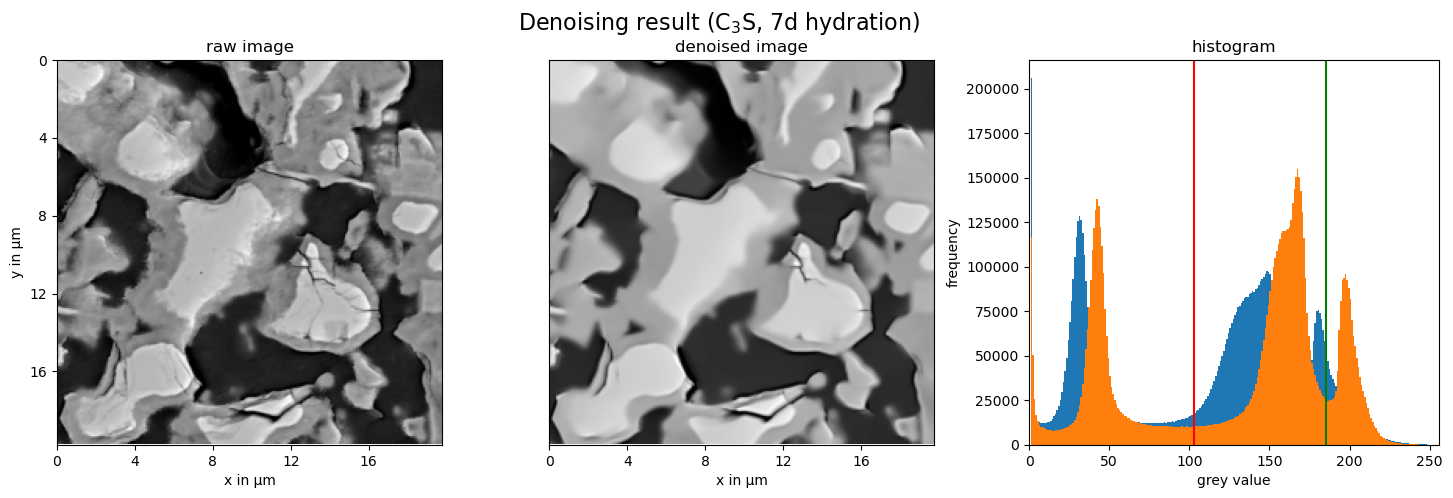

In [5]:
# enhance contrast and or denoise
IP.filter_image()

  5% done
 10% done
 15% done
 20% done
 25% done
 30% done
 35% done
 40% done
 45% done
 50% done
 55% done
 60% done
 65% done
 70% done
 75% done
 80% done
 85% done
 90% done
 95% done
100% done
fill holes took 9 s
pores: 32.3%, hydrates: 50.4%, C$_{3}}$S, 7d hydration: 17.4%


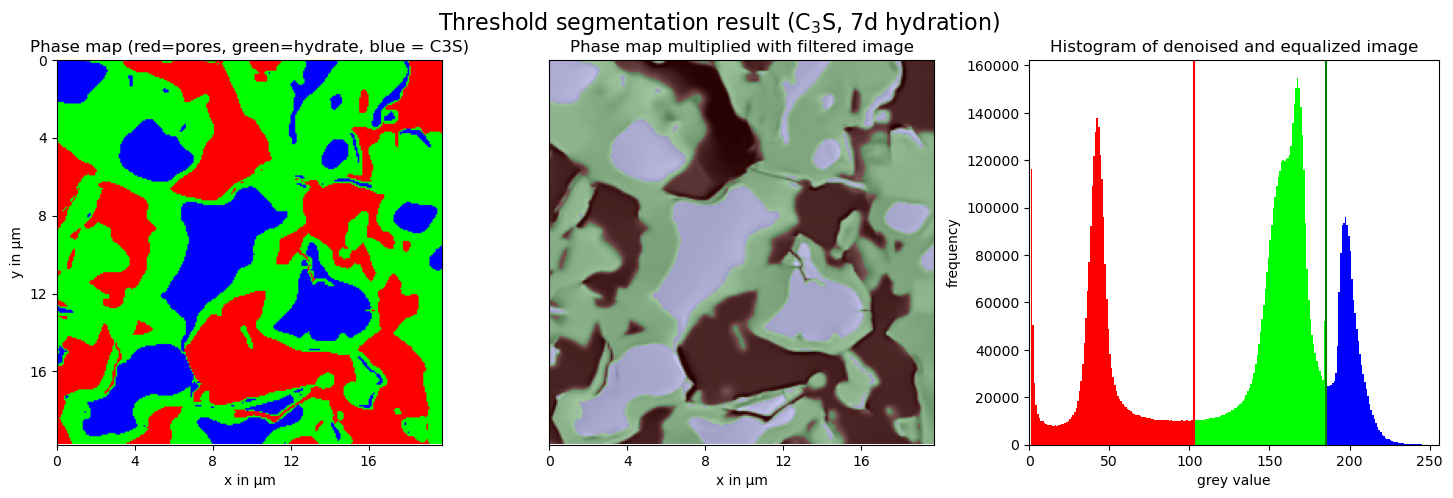

In [6]:
IP.set_thresholds( )
if show_images: IP.plot_thresh_result( )

In [7]:
IP.filter_contours(verbose = False)

  5% done
 10% done
 15% done
 20% done
 25% done
 30% done
 35% done
 40% done
 45% done
 50% done
 55% done
 60% done
 65% done
 70% done
 75% done
 80% done
 85% done
 90% done
 95% done
100% done


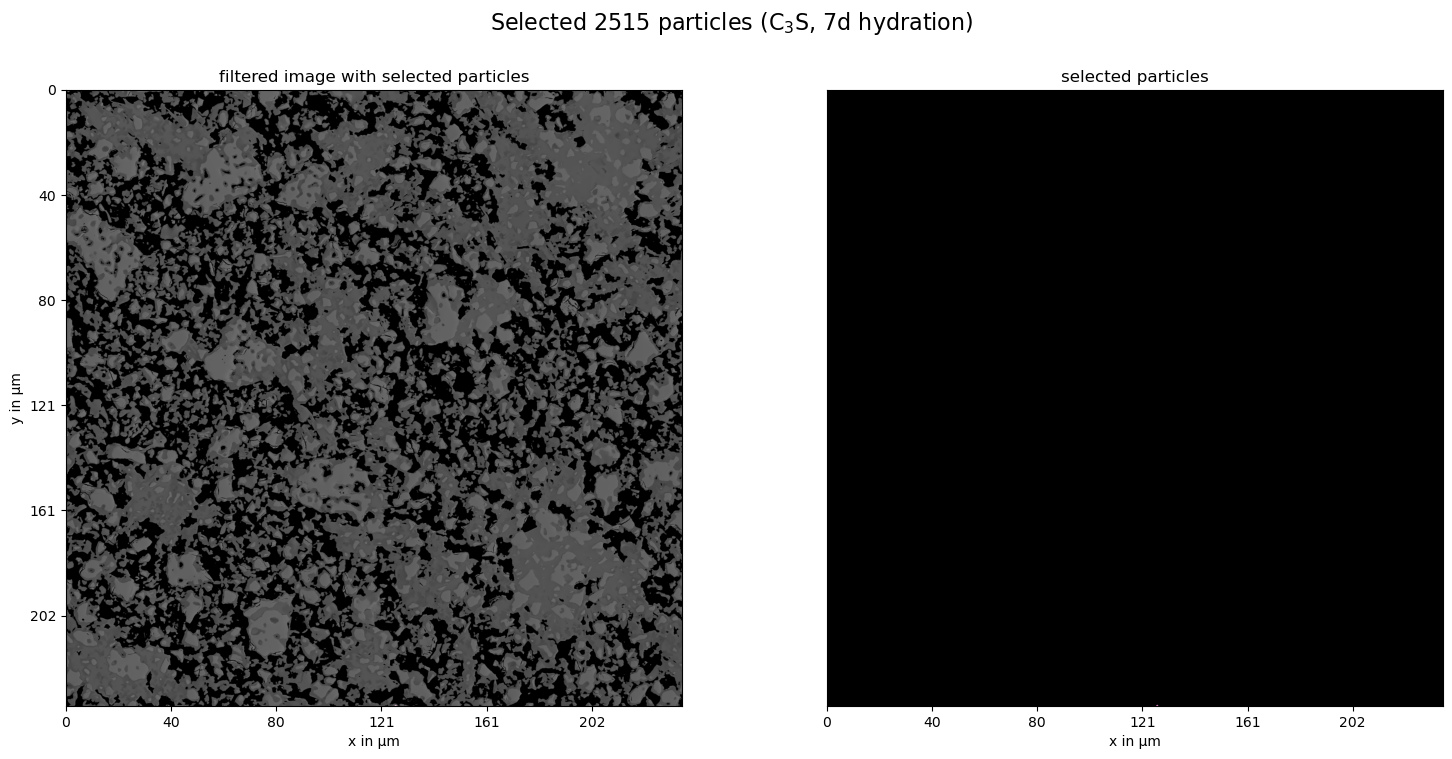

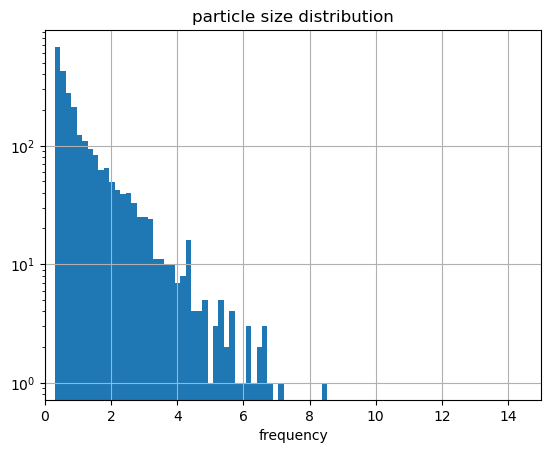

In [8]:
if show_images:
    IP.plot_selected_contours( )

    ax = IP.df_particles['diameter'].hist(bins=50)
    ax.set_title("particle size distribution")
    ax.set_xlabel("diameter in {}".format(IP.unit))
    ax.set_xlabel("frequency".format(IP.unit))
    ax.set_xlim([0,IP.settings['max_grain_dia']])
    ax.set_yscale('log')
    plt.show()

In [9]:
IP.process_particles(multithreading=True, processCount=9, load_saved=True)

Using 9 processes to measure the hydrate fringes.
  5% done, estimated time: 2.4 min, remaining time: 2.3 min
 10% done, estimated time: 2.1 min, remaining time: 1.9 min
 15% done, estimated time: 2.2 min, remaining time: 1.9 min
 20% done, estimated time: 2.4 min, remaining time: 2.0 min
 25% done, estimated time: 2.7 min, remaining time: 2.0 min
 30% done, estimated time: 3.0 min, remaining time: 2.1 min
 35% done, estimated time: 3.4 min, remaining time: 2.2 min
 40% done, estimated time: 3.7 min, remaining time: 2.2 min
 45% done, estimated time: 4.1 min, remaining time: 2.2 min
 50% done, estimated time: 4.4 min, remaining time: 2.2 min
 55% done, estimated time: 4.7 min, remaining time: 2.1 min
 60% done, estimated time: 5.1 min, remaining time: 2.0 min
 65% done, estimated time: 5.5 min, remaining time: 1.9 min
 70% done, estimated time: 5.9 min, remaining time: 1.7 min
 75% done, estimated time: 6.2 min, remaining time: 1.5 min
 80% done, estimated time: 6.6 min, remaining time

a * e^(-0.5 * ((log(x-d)-b)/c)^2)
a = 0.974,
b = -1.312,
c = 1.082,
d = 0.462


c:\Users\Florian Kleiner\Desktop\GIT\measure_hydrate_layer\functions.py:373: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plot = ax[1,0].pcolormesh(Y, X, Z, vmin=0, vmax=1.0, cmap='ocean_r')


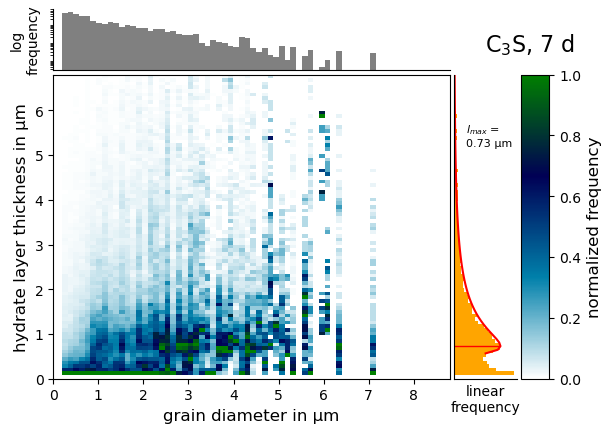

In [10]:
est_minima = 0.5 # estimated first minima for curve fitting
max_dia = 9#settings['max_grain_dia']
max_dia_rim = 7#settings['max_rim']
df_particles = IP.df_particles[(IP.df_particles.circularity > 0.3)]
r_max = plot_2d_result(df_particles, IP.df_hydrate_fringes, specimen, files[specimen]['label'], age, IP.scaling['x'], IP.unit, est_minima, width_f = 1/8, smooting_f = 1, max_dia = max_dia, max_dia_rim = max_dia_rim)

In [11]:
df = IP.df_hydrate_fringes[ ( IP.df_hydrate_fringes.len < IP.max_rim ) ]
df = pd.merge(df, IP.df_particles[['area', 'diameter', 'perimeter', 'circularity', 'measure_percent']], left_on='particle', right_index=True)
df_k = pd.unique(df.particle)

img_alite_used_contours    = np.zeros((IP.w,IP.h,3), np.uint8)
img_alite_removed_contours = np.zeros((IP.w,IP.h,3), np.uint8)
for i in range(len(IP.selected_contours)):
	if i in df_k:
		cv2.drawContours(img_alite_used_contours,    [IP.selected_contours[i][0]], 0, (150,150,255), cv2.FILLED, cv2.LINE_8)
	else:
		cv2.drawContours(img_alite_removed_contours, [IP.selected_contours[i][0]], 0, (255,150,150), cv2.FILLED, cv2.LINE_8)

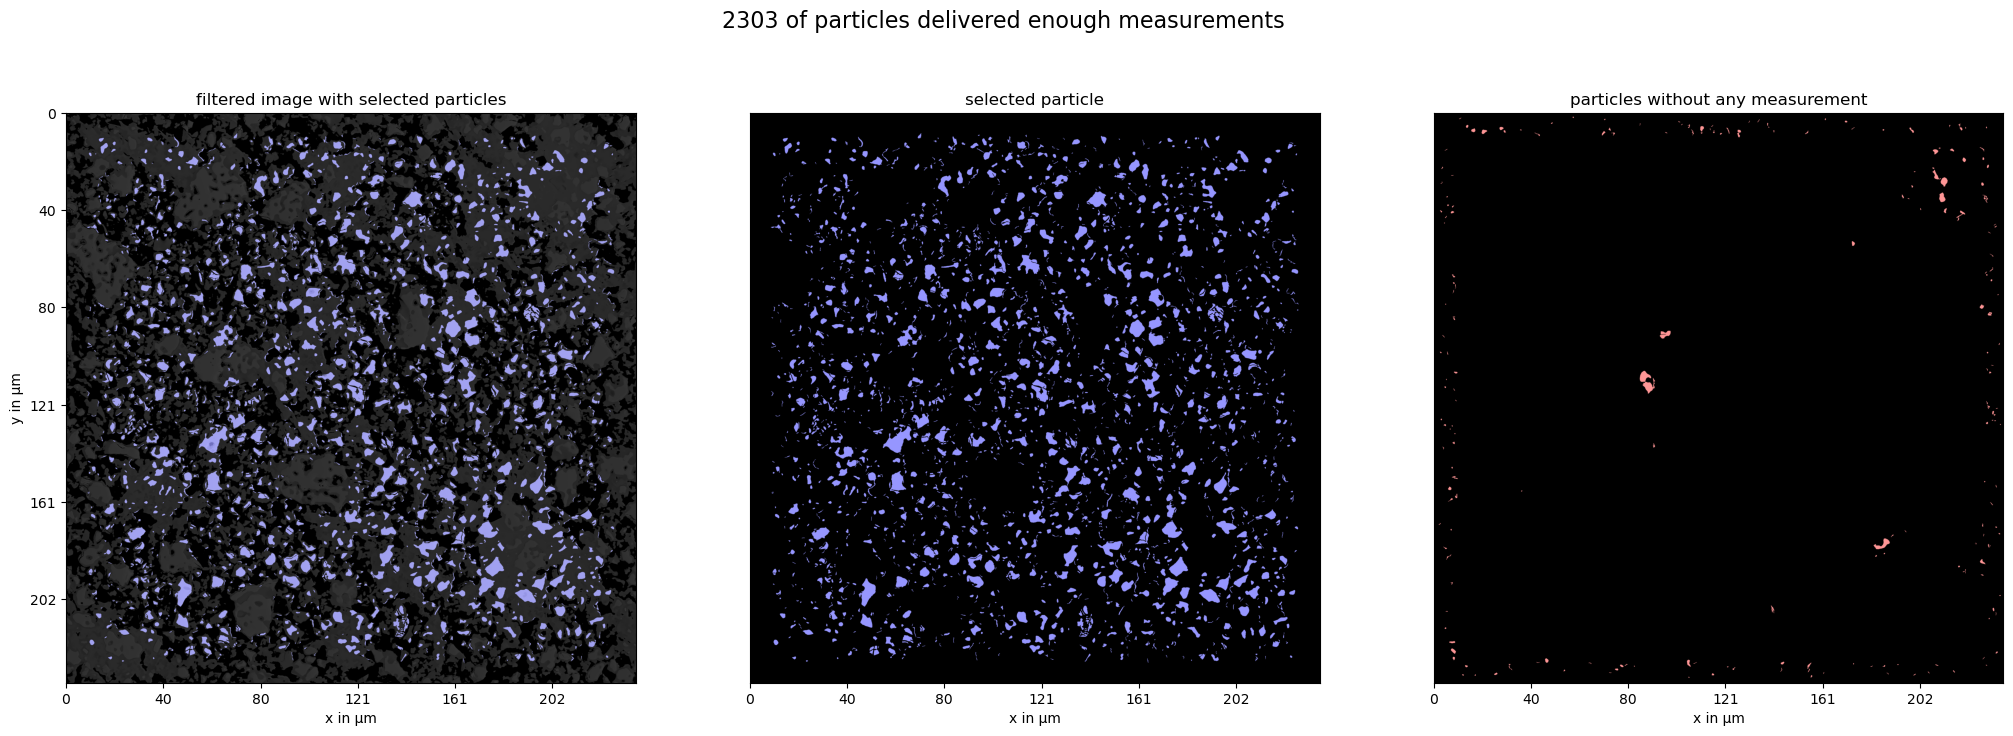

In [12]:
fig, ax = plt.subplots(1, 3, figsize=( 25, 8 ))
fig.suptitle( "{} of particles delivered enough measurements".format(len(df_k), len(IP.selected_contours)), fontsize=16 )

i = 0
ax[i].imshow( cv2.addWeighted( cv2.cvtColor(IP.removed_pores, cv2.COLOR_GRAY2RGB), 0.25, img_alite_used_contours, 0.75, 0.0) )
ax[i].set_title(  "filtered image with selected particles" )
ax[i].set_xlabel( "x in {}".format( IP.unit ) )
ax[i].set_ylabel( "y in {}".format( IP.unit ) )
tick_pos, tick_labels = IP.get_image_axis_labels( ax[i] )
ax[i].set_xticks(tick_pos, tick_labels )
ax[i].set_yticks(tick_pos, tick_labels )
ax[i].set_xlim([0,IP.h-1])
ax[i].set_ylim([IP.w-1,0])

i += 1
ax[i].imshow( img_alite_used_contours )
ax[i].set_title(  "selected particle" )
ax[i].set_xlabel( "x in {}".format( IP.unit ) )
#ax[i].set_ylabel( "y in {}".format( IP.unit ) )
ax[i].set_xticks(tick_pos, tick_labels )
ax[i].set_yticks( [], [] )
ax[i].set_xlim([0,IP.h-1])
ax[i].set_ylim([IP.w-1,0])

i += 1
ax[i].imshow( img_alite_removed_contours )
ax[i].set_title(  "particles without any measurement" )
ax[i].set_xlabel( "x in {}".format( IP.unit ) )
#ax[i].set_ylabel( "y in {}".format( IP.unit ) )
ax[i].set_xticks(tick_pos, tick_labels )
ax[i].set_yticks( [], [] )
ax[i].set_xlim([0,IP.h-1])
ax[i].set_ylim([IP.w-1,0])

plt.show()